In [81]:
import pandas as pd
import numpy as np

# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
import os

use_prev = False 

data_dir = 'Data'
P_cols = ['age_calculated',  'male', 'female',]

o_col = ['ncipr_min_osat',]
    
    
S_cols = ['Bluish Lips/Face',
       'Chest Pressure/Chest Pain', 'Chills or Shaking',
       'Complete Loss of Smell (Anosmia)', 'Complete Loss of Taste (Ageusia)',
       'Confusion or Inability to Arouse', 'Cough',
       'Diarrhea (>=3 loose/looser than normal stools/24 hr. period)',
       'Ear pain', 'Eye Redness with or without Discharge',
       'Fever (>100.4 F/38 C)', 'Headache', 'Muscle Pain/Body Aches',
       'Nausea or Vomiting', 
    #    'None of these apply',
       'other_symptoms',
       'Partial Loss of Smell (Partial Anosmia)',
       'Partial Loss of Taste (Partial Ageusia)',
       'Runny Nose/Sinus Congestion',
       'Shortness of Breath/Difficulty Breathing', 'Skin rash or Skin ulcers',
       'Sneezing', 'Sore Throat', 'Unusual Fatigue/Lethargy', 'Wheezing',
       # immune system health concerns
'pregnancy',
'respiratory health concerns (e.g.',
'high blood pressure',
'diabetes',
'cardiac health concerns',
'cancer',
]

C_cols = [
    'Pneumonia (Bacterial or Viral)',
            'Inadequate Oxygen or Hypoxia',
            'Cardiac Problems (Cardiomyopathy',
            'Acute Respiratory Distress Syndrome',
            'Hyperglycemia/ Hypoglycemia (Abnormal Blood Sugar)',
            'Anemia (Lack of red blood cells or hemoglobin)',
            'Water in the Lungs (Pleural effusion)',
            'Kidney Injury or Failure',
            'Heart Inflammation (Endocarditis',
            'Liver Dysfunction',
            'Sepsis (serious infection that causes your immune system to attack your body)',
            'Bleeding in digestive tract (Gastrointestinal Hemorrhage)',
            'Collapsed Lung (Pneumothorax)',
            'Inflammation or infection of the brain or meninges (Meningitis / Encephalitis)',
            'Stroke / Cerebrovascular accident',
            'Seizure',
            ]

y_col =['ncipr_how_severe_self']

a_col = ['oxygen_administered']
T_cols = a_col + ['Admission to ICU or High Dependency Unit', 'Chest X-ray',
       'Convalescent plasma (blood plasma taken from people who have recovered from COVID-19 and may have antibodies)',
       'IV fluids', 'Invasive ventilation (Tracheostomy',
       'Non-invasive Ventilation (such as continuous positive airway pressure/CPAP/BiPAP)',
       'other_treatmens', 'Other kind of imaging such as Ultrasound',
       'Prolonged cardiac and respiratory support (Extracorporeal support)',
       'Renal replacement therapy (RRT) or dialysis?',
       'Transfer into a prone position (lying face down on your stomach) for extended periods of time',
       'Anti-inflammatory corticosteroid (such as Dexamethesone',
       'Antibiotic (such as Azithromycin)', 'Antifungal',
       'Cardiovascular drug (such as Inotropes/vasopressors)',
       'Hydroxychloroquine (Plaquenil)',
       'Immunosuppressive medication (such as Tocilizumab',
       'other_prescription_treatments', 'Remdesivir or other anti-viral']


data_path = os.path.join(data_dir, 'covid_data.pickle')

covid_df = pd.read_pickle(data_path).astype(np.float32)

In [82]:
def get_process_data(data_path,P_cols,S_cols, o_col, C_cols, a_col, y_col, test_size=0.2, random_state=23423,):
    covid_df = pd.read_pickle(data_path).astype(np.float32)

    if test_size == 0.0:
        train_df = shuffle(covid_df, random_state=random_state)
        test_df = pd.DataFrame(columns=train_df.columns)
    else:    
        train_df, test_df = train_test_split(covid_df, test_size=test_size, random_state=random_state)

    train_dic = {'P':train_df[P_cols],
                'S':train_df[S_cols],
                'o':train_df[o_col],
                'C':train_df[C_cols],
                'T':train_df[a_col],
                'y':train_df[y_col]
                }

    test_dic = {'P':test_df[P_cols],
                'S':test_df[S_cols],
                'o':test_df[o_col],
                'C':test_df[C_cols],
                'T':test_df[a_col],
                'y':test_df[y_col]
                }
    return train_dic, test_dic

In [83]:
# pd.concat(train_dic, axis=1)

In [84]:
train_dic, test_dic = get_process_data(data_path,P_cols,S_cols, o_col, C_cols, a_col, y_col, test_size=0.0)

In [85]:
# model_spec = f"""
#     # measurement model
#     U_a =~ {" + ".join(X_cols)} + {" + ".join(a_col)})
#     U_y =~ {" + ".join(X_cols)} + {" + ".join(a_col)}) + {" + ".join(y_col)})


# """

In [86]:
# " + ".join(a_col)

In [87]:
# inputs = keras.Input(shape=(len(X_cols,)))
# a = keras.layers.Dense(1, activation=None)(inputs)

# y = keras.layers.Dense(1)(keras.layers.Concatenate()([inputs, a]))

# model = keras.Model(inputs = inputs, outputs=[a,y])

# model.compile(loss='mse')

In [88]:
# model.summary()

In [89]:
# history = model.fit(x=train_dic['X'], y=[train_dic['a'], train_dic['y']], epochs=100, validation_data=(test_dic['X'], [test_dic['a'], test_dic['y']]))

In [90]:
# import matplotlib.pyplot as plt

# plt.plot(history.history['dense_1_loss'])
# plt.plot(history.history['val_dense_1_loss'])
# plt.title('model mse')
# plt.ylabel('mse')
# plt.xlabel('epoch')
# plt.legend(['train', 'val'], loc='best')
# plt.show()

In [91]:
# history.history['val_dense_1_loss'][np.argmin(history.history['dense_1_loss'])]

In [92]:
train_dic['y'].describe()

,ncipr_how_severe_self
count,1747.000000
mean,1.184316
std,0.997893
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,4.000000


In [93]:
# import keras.backend as K

# def customLoss(yTrue,yPred):
#     return K.sum(K.log(yTrue) - K.log(yPred))

In [94]:
import seaborn as sns

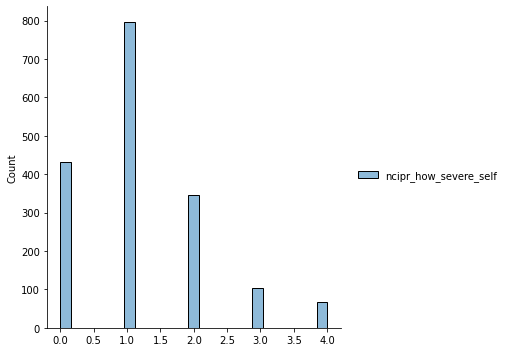

In [95]:
sns.displot(train_dic['y'])

In [96]:
from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

In [97]:
# use_prev = False

kf = KFold(n_splits=5)
mses = []
for i, (train_index, test_index) in enumerate(kf.split(pd.concat(train_dic, axis=1))):
    ### FIT ###
    a_in = np.hstack((train_dic['P'].iloc[train_index], train_dic['S'].iloc[train_index]))
    a_out = train_dic['T'].iloc[train_index]
    a_model = LinearRegression().fit(a_in, a_out)

    if use_prev:
        a_hat = a_model.predict(a_in)
        y_in = np.concatenate((train_dic['P'].iloc[train_index], train_dic['S'].iloc[train_index],a_hat), axis=1)
    else:
        y_in = np.concatenate((train_dic['P'].iloc[train_index], train_dic['S'].iloc[train_index], train_dic['T'].iloc[train_index]), axis=1)
    y_out = train_dic['y'].iloc[train_index]
    y_model = LinearRegression().fit(y_in, y_out)
    
    ### EVALUATE ###
    # y_hat = y_model.predict(np.concatenate((train_dic['P'].iloc[test_index], train_dic['S'].iloc[test_index], train_dic['T'].iloc[test_index]), axis=1))
    a_in = np.hstack((train_dic['P'].iloc[test_index], train_dic['S'].iloc[test_index]))
    a_hat = a_model.predict(a_in)
    y_hat = y_model.predict(np.concatenate((train_dic['P'].iloc[test_index], train_dic['S'].iloc[test_index], a_hat), axis=1))

    mses.append(mean_squared_error(y_hat, train_dic['y'].iloc[test_index]))
    print(f'fold {i} mse: ', mses[-1])
    
    


fold 0 mse:  0.61614347
fold 1 mse:  0.5951255
fold 2 mse:  0.53253096
fold 3 mse:  0.5625549
fold 4 mse:  0.6224163


In [98]:
np.mean(mses)

0.5857542

In [99]:
a_model = LinearRegression().fit(np.hstack((train_dic['P'], train_dic['S'])), train_dic['T'])

a_hat = a_model.predict(np.hstack((train_dic['P'], train_dic['S'])))
if use_prev:
    # a_hat = a_model.predict(np.hstack((train_dic['P'], train_dic['S'])))#.reshape(-1, 1)
    y_model = LinearRegression().fit(np.concatenate((train_dic['P'], train_dic['S'], a_hat), axis=1), train_dic['y'])
else:
    y_model = LinearRegression().fit(np.concatenate((train_dic['P'], train_dic['S'], train_dic['T']), axis=1), train_dic['y'])
# y_hat = y_model.predict(np.concatenate((train_dic['X'], train_dic['S'], a_model.predict(np.hstack((train_dic['X'], train_dic['S'])))), axis=1))


In [100]:
# Abduction
if use_prev:
    y_hat = y_model.predict(np.concatenate((train_dic['P'], train_dic['S'], a_hat), axis=1))
    
else:
    y_hat = y_model.predict(np.concatenate((train_dic['P'], train_dic['S'], train_dic['T']), axis=1))
U_a = train_dic['T'] - a_hat
U_y = train_dic['y'] - y_hat

In [101]:
# Action, Prediction
a_TO0 = a_hat + U_a
a_TO0.iloc[:,T_cols.index(a_col[0])] = 0.0
y_TO0 = y_model.predict(np.concatenate((train_dic['P'], train_dic['S'], a_TO0,), axis=1)) + U_y

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

def bland_altman_plot(data1, data2, *args, **kwargs):
    data1     = np.asarray(data1)
    data2     = np.asarray(data2)
    mean      = np.mean([data1, data2], axis=0)
    diff      = data1 - data2                   # Difference between data1 and data2
    md        = np.mean(diff)                   # Mean of the difference
    sd        = np.std(diff, axis=0)            # Standard deviation of the difference

    plt.scatter(mean, diff, *args, **kwargs)
    plt.axhline(md,           color='gray', linestyle='--')
    plt.axhline(md + 1.96*sd, color='gray', linestyle='--')
    plt.axhline(md - 1.96*sd, color='gray', linestyle='--')

In [103]:
def plot_change():
    train_df = pd.concat(train_dic, axis=1)
    train_df['y_TO0'] = y_TO0
    train_ox_df = train_df[train_df[('T', a_col[0])] == 1.0]

    plt.figure()
    bland_altman_plot( train_ox_df['y_TO0'].values.flatten(), train_ox_df['y'].values.flatten(),)
    # plt.ylim(-5, 5)

    plt.figure()
    sns.displot(data=train_ox_df[['y', 'y_TO0']], kind='kde')

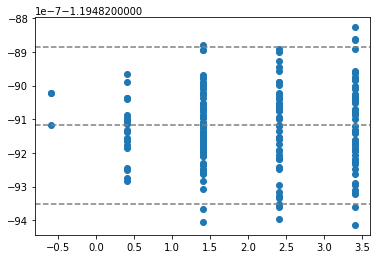

<Figure size 432x288 with 0 Axes>

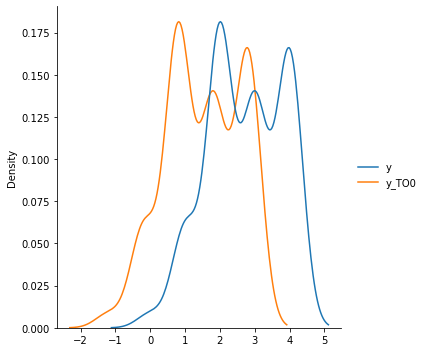

In [104]:
plot_change()

## Complicated DAG


In [105]:
kf = KFold(n_splits=5)
mses = []
for i, (train_index, test_index) in enumerate(kf.split(pd.concat(train_dic, axis=1))):
    ## FIT ##

    # treatments
    t_in = np.hstack((train_dic['P'].iloc[train_index], train_dic['S'].iloc[train_index]))
    t_out = train_dic['T'].iloc[train_index]
    t_model = LinearRegression().fit(t_in, t_out)
    if use_prev:
        t_hat = t_model.predict(t_in)

    # c_in = np.hstack((train_dic['P'].iloc[train_index], train_dic['S'].iloc[train_index], t_hat,))
    # c_out = train_dic['C'].iloc[train_index]
    # c_model = LinearRegression().fit(c_in, c_out)
    # # c_hat = c_model.predict(c_in)
    # # c_hat = np.clip(c_hat, 0, 1)

    # o2 saturatarion
    if use_prev:
        o_in = np.hstack((train_dic['S'].iloc[train_index], t_hat,))
    else:
        o_in = np.hstack((train_dic['S'].iloc[train_index], train_dic['T'].iloc[train_index],))
    o_out = train_dic['o'].iloc[train_index]
    o_model = LinearRegression().fit(o_in, o_out)
    if use_prev:
        o_hat = o_model.predict(o_in)

    # severity
    if use_prev:
        y_in = np.concatenate((train_dic['P'].iloc[train_index], train_dic['S'].iloc[train_index], o_hat), axis=1)
    else:
        y_in = np.concatenate((train_dic['P'].iloc[train_index], train_dic['S'].iloc[train_index], train_dic['o'].iloc[train_index]), axis=1)
    y_out = train_dic['y'].iloc[train_index]
    y_model = LinearRegression().fit(y_in, y_out)
    # y_model = LinearRegression().fit(np.concatenate((train_dic['X'].iloc[train_index], train_dic['S'].iloc[train_index], a_hat), axis=1), train_dic['y'].iloc[train_index])
    
    ## EVALUATE ##
    t_hat = t_model.predict(np.hstack((train_dic['P'].iloc[test_index], train_dic['S'].iloc[test_index]))).reshape(-1,1)
    
    # c_hat = c_model.predict(np.hstack((train_dic['P'].iloc[test_index], train_dic['S'].iloc[test_index], t_hat,)))
    # c_hat = np.clip(c_hat, 0, 1)
    o_hat = o_model.predict(np.hstack((train_dic['S'].iloc[test_index], t_hat)))

    y_in = np.concatenate((train_dic['P'].iloc[test_index], train_dic['S'].iloc[test_index], o_hat), axis=1)
    y_out = train_dic['y'].iloc[test_index]
    y_hat = y_model.predict(y_in)
    

    mses.append(mean_squared_error(y_hat, y_out))
    print(f'fold {i} mse: ', mses[-1])

fold 0 mse:  0.616057
fold 1 mse:  0.5950748
fold 2 mse:  0.53220123
fold 3 mse:  0.56195813
fold 4 mse:  0.6237843


In [106]:
np.mean(mses)

0.5858151

In [107]:
t_in = np.hstack((train_dic['P'], train_dic['S']))
t_out = train_dic['T']
t_model = LinearRegression().fit(t_in, t_out)

if use_prev:
    t_hat = t_model.predict(t_in).reshape(-1,1)

# c_in = np.hstack((train_dic['P'], train_dic['S'], t_hat,))
# c_out = train_dic['C']
# c_model = LinearRegression().fit(c_in, c_out)
# c_hat = c_model.predict(c_in)
# c_hat = np.clip(c_hat, 0, 1)

if use_prev:
    o_in = np.hstack((train_dic['S'], t_hat))
else:
    o_in = np.hstack((train_dic['S'], train_dic['T']))
o_out = train_dic['o']
o_model = LinearRegression().fit(o_in, o_out)
if use_prev:
    o_hat = o_model.predict(o_in)

if use_prev:
    y_in = np.concatenate((train_dic['P'], train_dic['S'], o_hat), axis=1)
else:
    y_in = np.concatenate((train_dic['P'], train_dic['S'], train_dic['o']), axis=1)
y_out = train_dic['y']
y_model = LinearRegression().fit(y_in, y_out)
# y_model = LinearRegression().fit(np.concatenate((train_dic['X'].iloc[train_index], train_dic['S'].iloc[train_index], a_hat), axis=1), train_dic['y'].iloc[train_index])


### Abduction

In [108]:

t_hat = t_model.predict(np.hstack((train_dic['P'], train_dic['S']))).reshape(-1,1)
# c_hat = c_model.predict(np.hstack((train_dic['P'], train_dic['S'], t_hat,)))
# o_hat = o_model.predict(np.hstack((train_dic['S'], train_dic['T'])))
if use_prev:
    o_hat = o_model.predict(np.hstack((train_dic['S'], t_hat)))
else:
    o_hat = o_model.predict(np.hstack((train_dic['S'], train_dic['T'])))

# y_in = np.concatenate((train_dic['P'], train_dic['S'], train_dic['o']), axis=1)
if use_prev:
    y_in = np.concatenate((train_dic['P'], train_dic['S'], o_hat), axis=1)
else:
    y_in = np.concatenate((train_dic['P'], train_dic['S'], train_dic['o']), axis=1)

y_out = train_dic['y']
y_hat = y_model.predict(y_in)

In [109]:
U_t = train_dic['T'] - t_hat 
U_o = train_dic['o'] - o_hat 
# U_c = train_dic['C'] - c_hat 
U_y = train_dic['y'] - y_hat

### Action

In [110]:
t_O0 = t_hat + U_t
t_O0.iloc[:,T_cols.index(a_col[0])] = 0.0


### Prediction

In [111]:

# c_hat = c_model.predict(np.hstack((train_dic['P'], train_dic['S'], t_hat))) + U_c
# c_hat = np.clip(c_hat, 0, 1)
o_hat = o_model.predict(np.hstack((train_dic['S'], t_O0, ))) + U_o


y_in = np.concatenate((train_dic['P'], train_dic['S'], o_hat), axis=1)
# y_out = train_dic['y']
y_TO0 = y_model.predict(y_in) + U_y

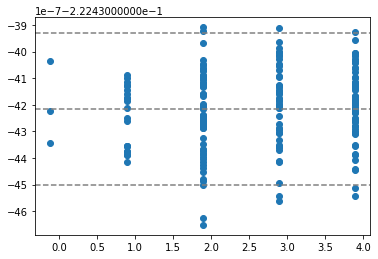

<Figure size 432x288 with 0 Axes>

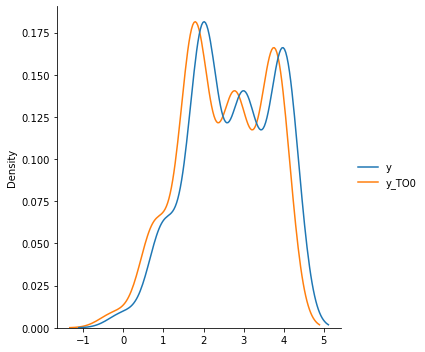

In [112]:
plot_change()

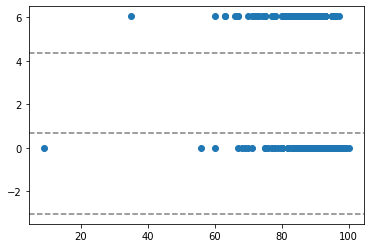

In [113]:
bland_altman_plot(o_hat, train_dic['o'])

In [114]:
from sklearn.preprocessing import StandardScaler

covid_df['ncipr_min_osat'].unique()

covid_df.iloc[:] = StandardScaler().fit_transform(covid_df)

<AxesSubplot:xlabel='oxygen_administered', ylabel='ncipr_min_osat'>

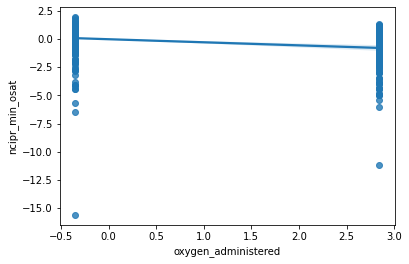

In [115]:
symp_o2 = LinearRegression().fit(covid_df[S_cols + P_cols], covid_df['ncipr_min_osat'])
eps = covid_df['ncipr_min_osat'] - symp_o2.predict(covid_df[S_cols + P_cols])
sns.regplot(x=covid_df['oxygen_administered'], y=eps)

<AxesSubplot:xlabel='oxygen_administered', ylabel='ncipr_min_osat'>

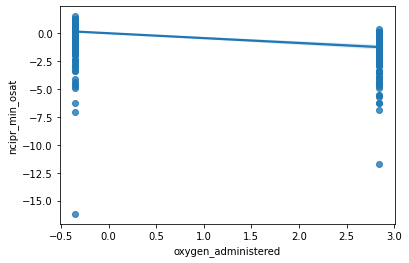

In [116]:
# symp_o2 = LinearRegression().fit(covid_df[S_cols + P_cols], covid_df['ncipr_min_osat'])
# eps = covid_df['ncipr_min_osat'] - symp_o2.predict(covid_df[S_cols + P_cols])
sns.regplot(x=covid_df['oxygen_administered'], y=covid_df['ncipr_min_osat'])

<AxesSubplot:xlabel='ncipr_min_osat', ylabel='ncipr_min_osat'>

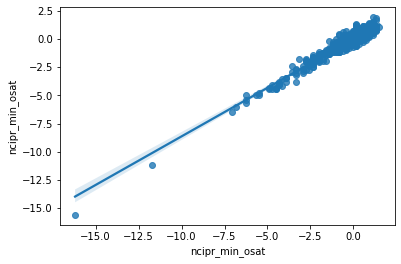

In [117]:
sns.regplot(y=eps, x=covid_df['ncipr_min_osat'])

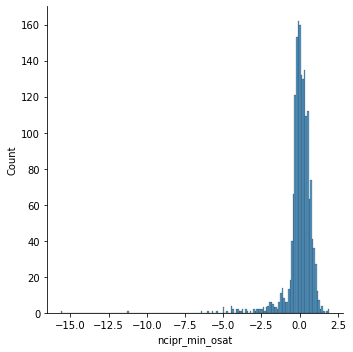

In [118]:
sns.displot(eps)

In [119]:
sns.regplot(data=covid_df[S_cols] x=covid_df[S_cols], y=covid_df['ncipr_min_osat'])

SyntaxError: invalid syntax (3814037431.py, line 1)

/tmp/ipykernel_4103/2830820722.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


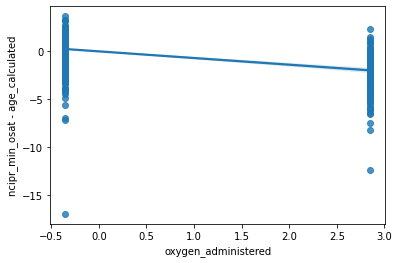

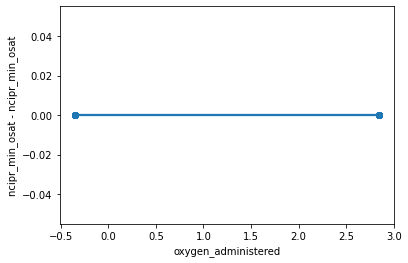

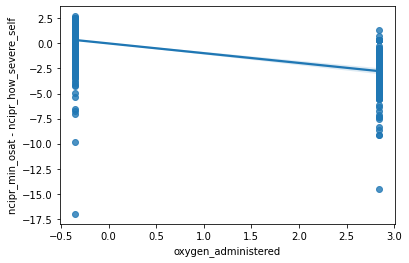

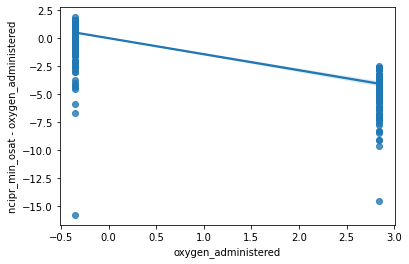

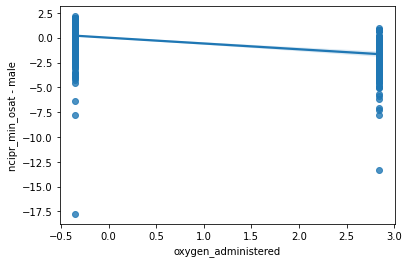

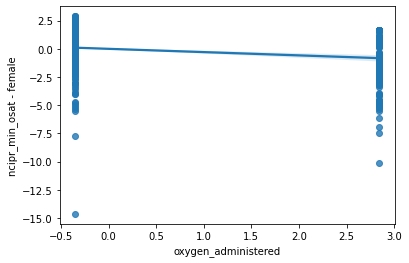

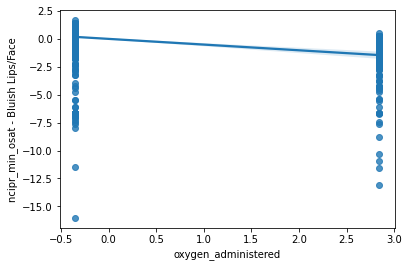

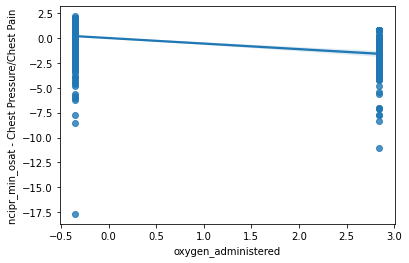

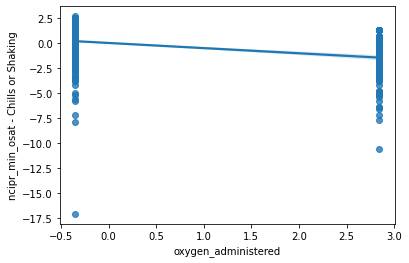

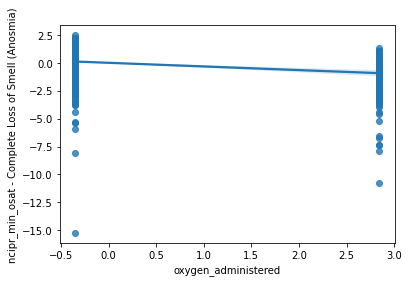

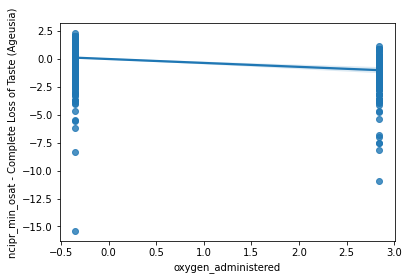

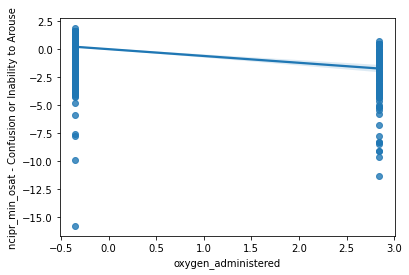

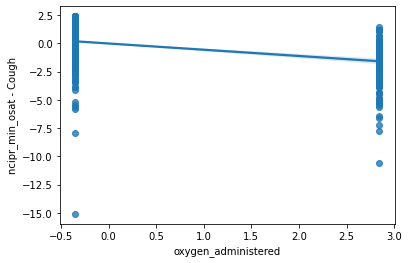

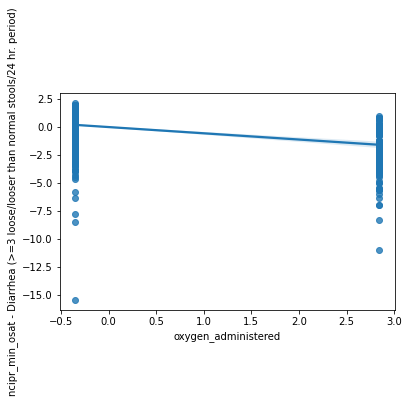

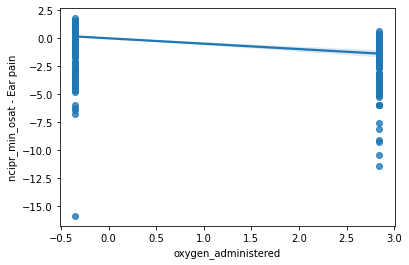

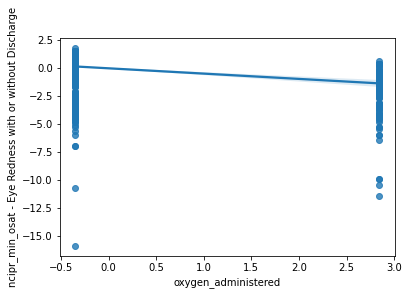

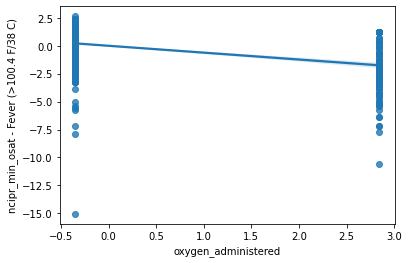

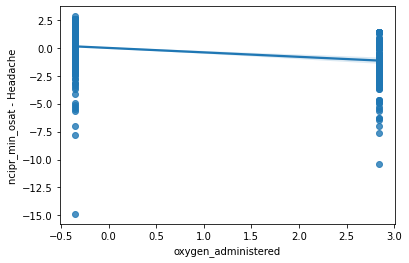

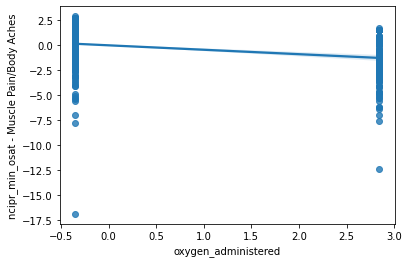

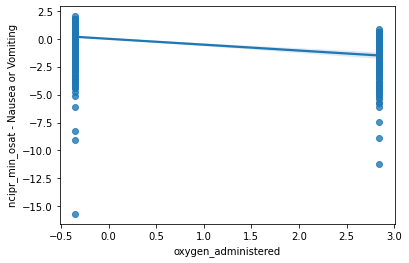

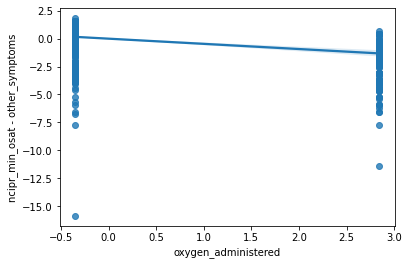

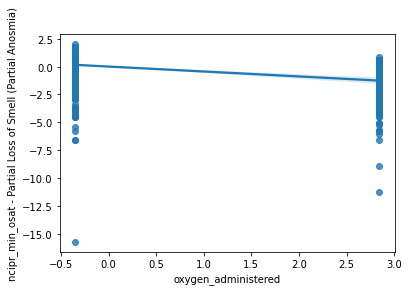

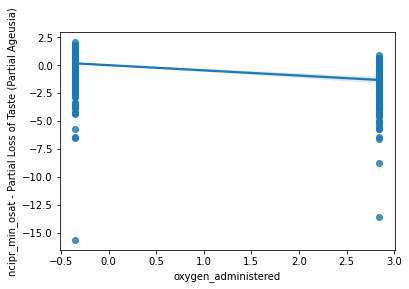

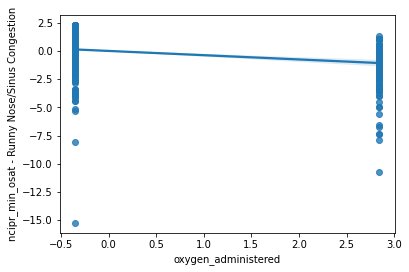

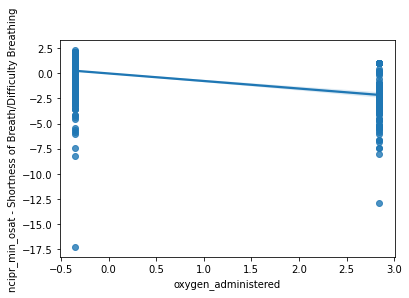

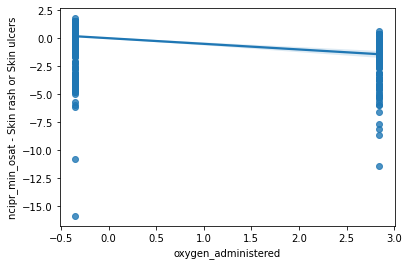

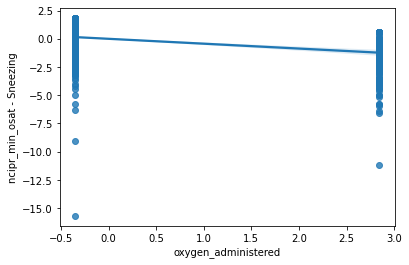

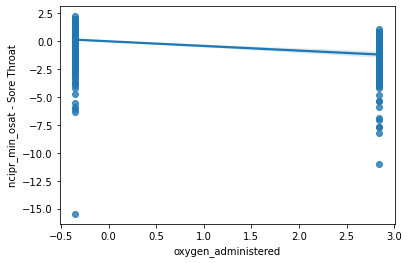

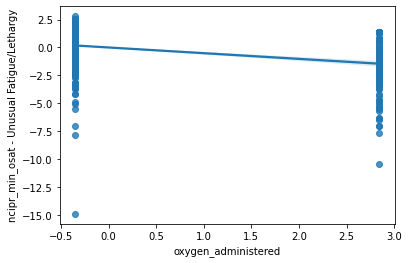

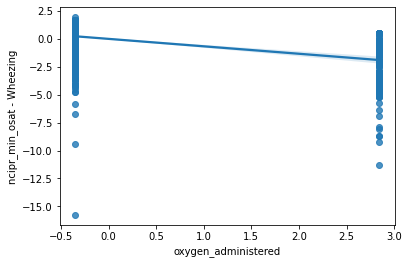

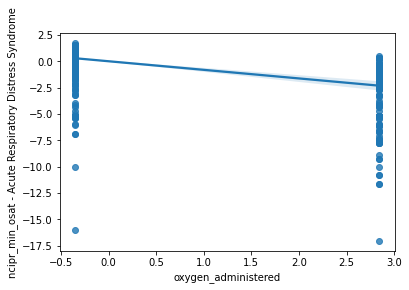

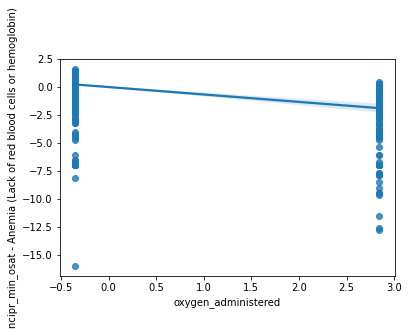

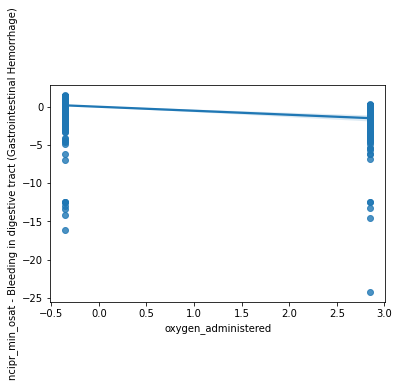

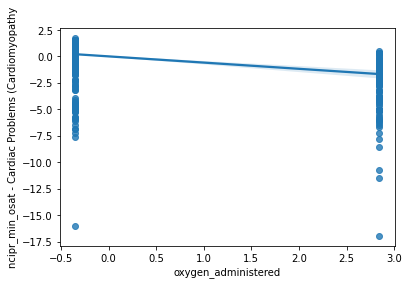

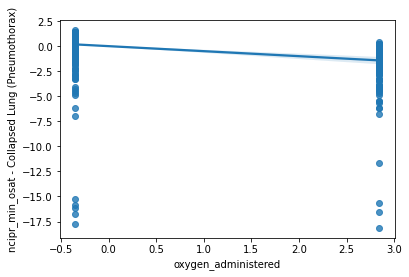

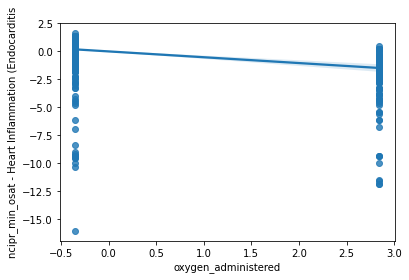

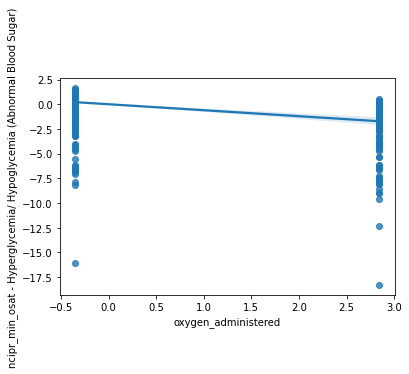

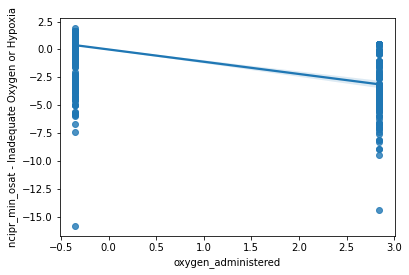

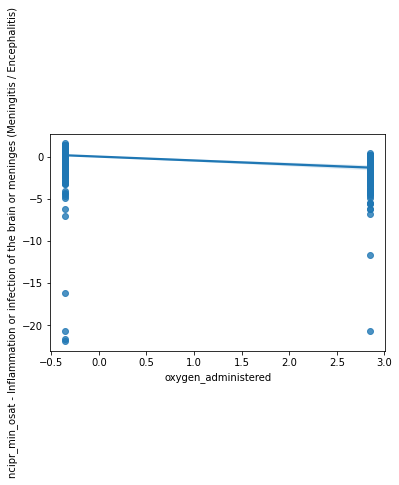

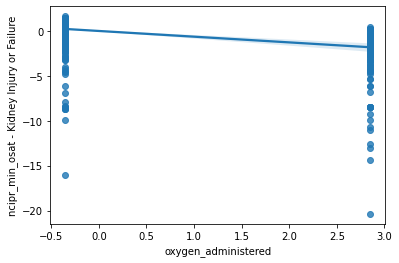

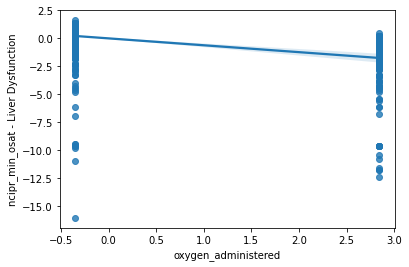

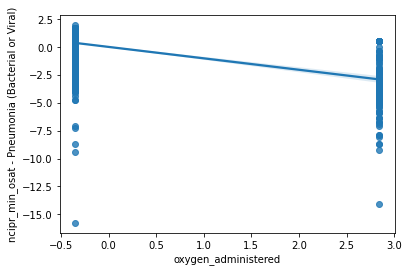

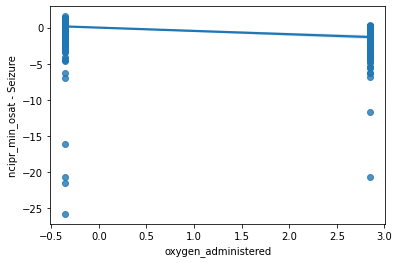

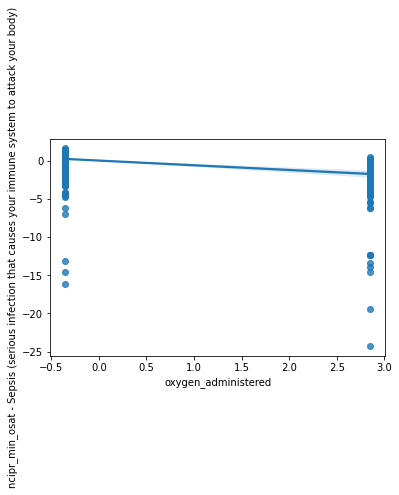

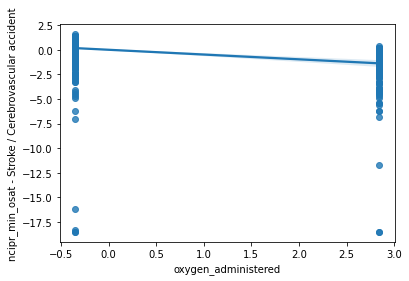

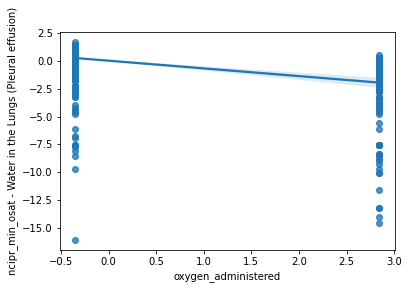

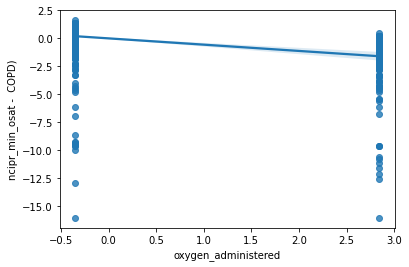

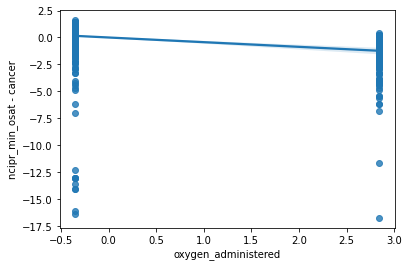

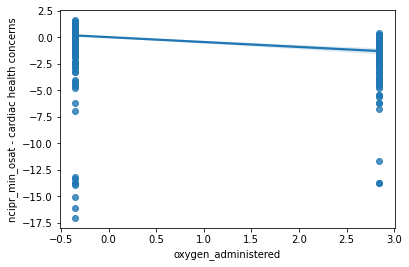

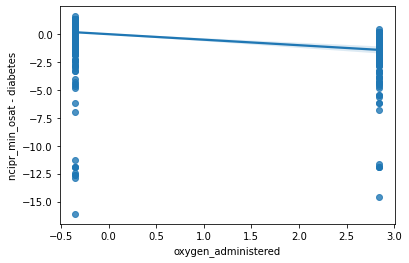

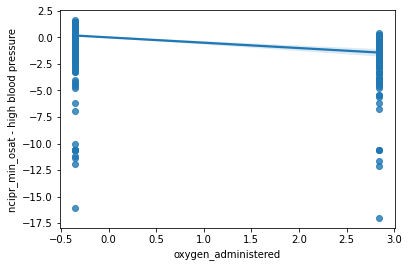

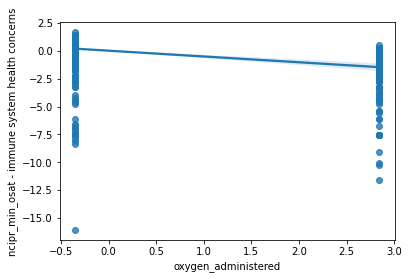

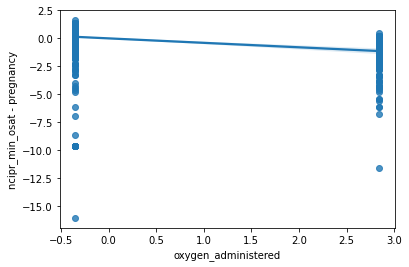

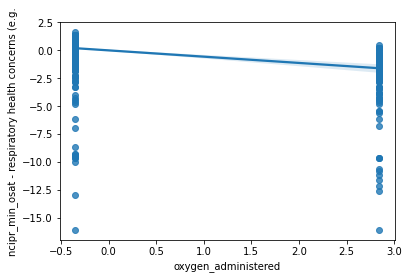

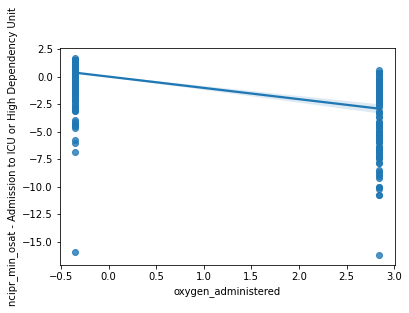

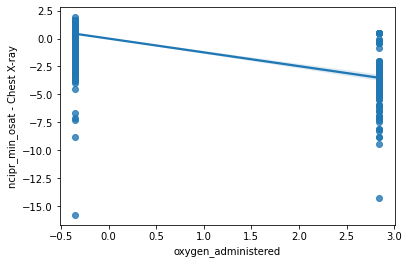

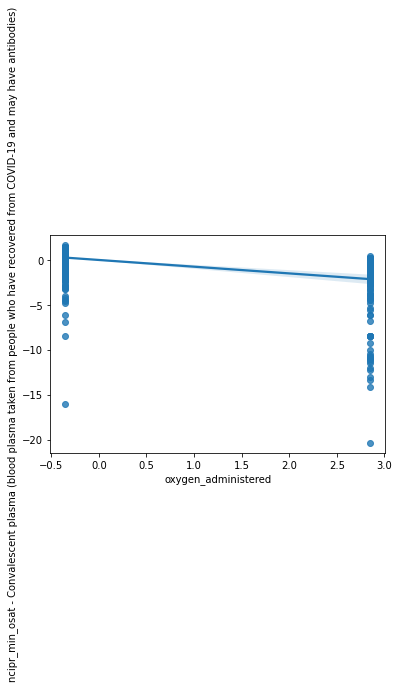

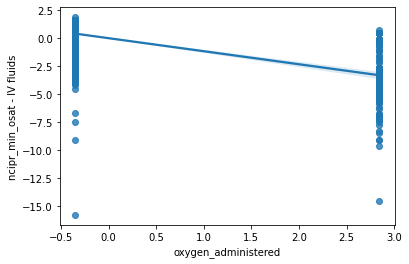

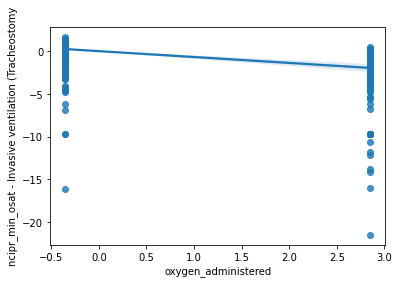

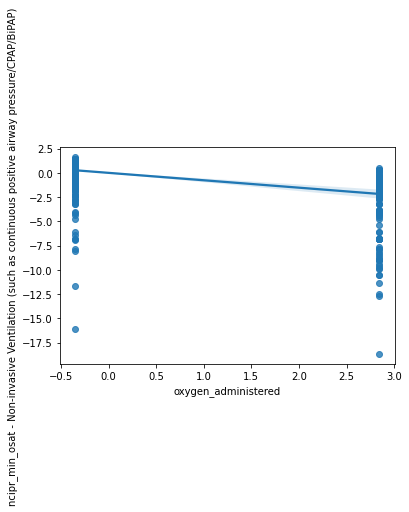

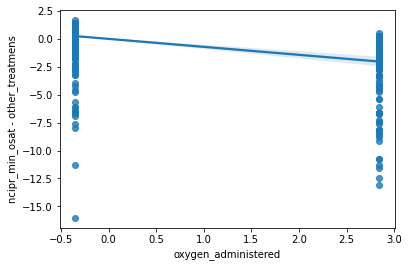

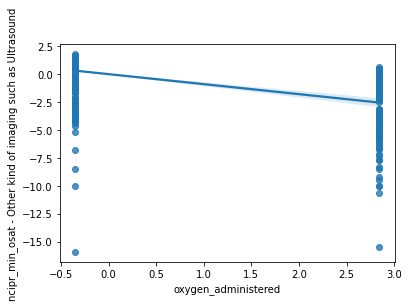

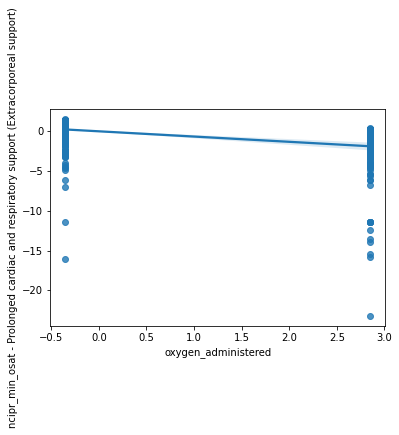

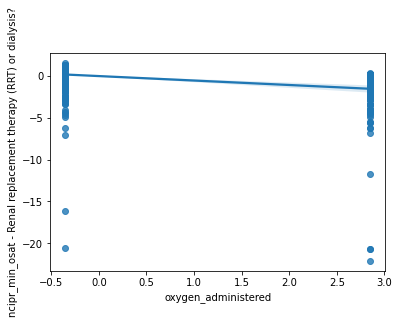

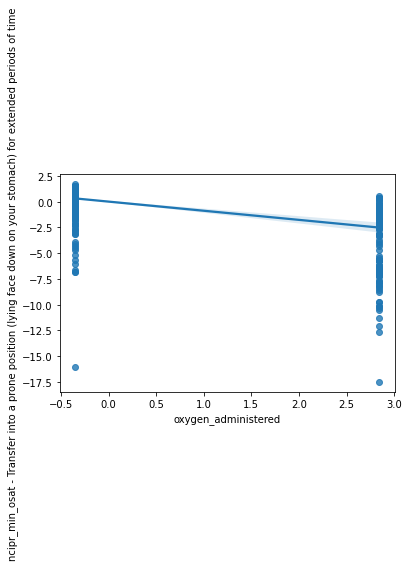

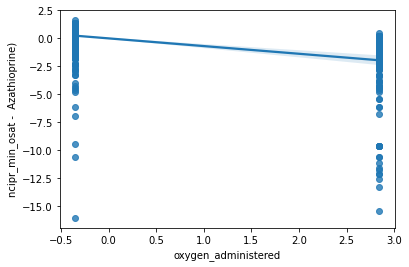

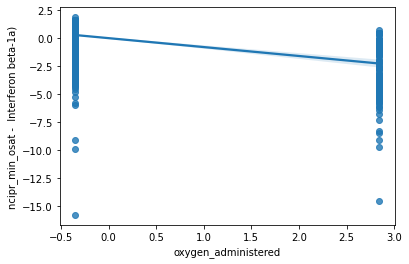

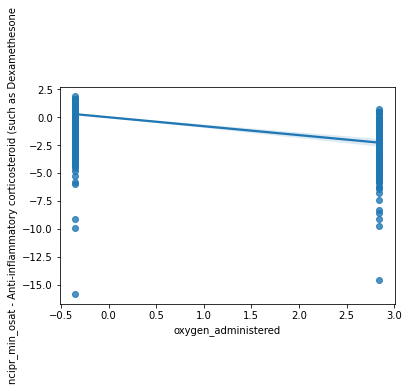

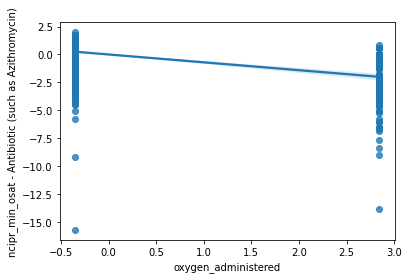

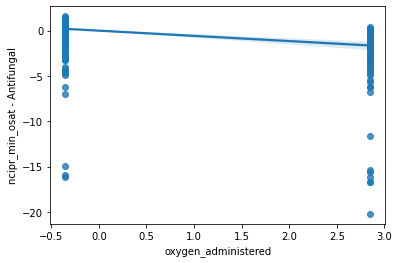

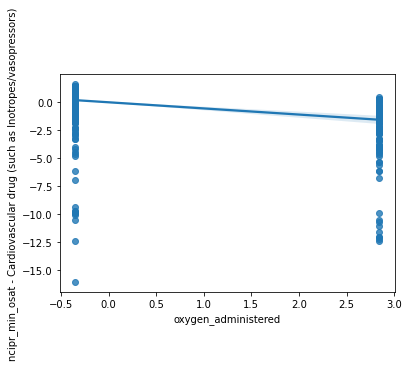

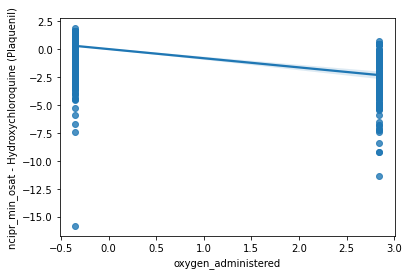

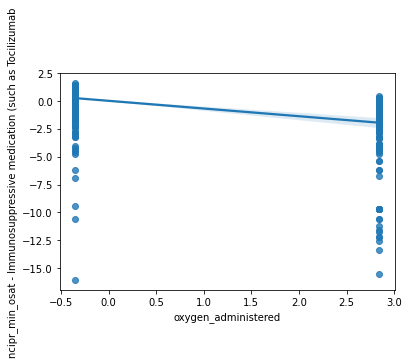

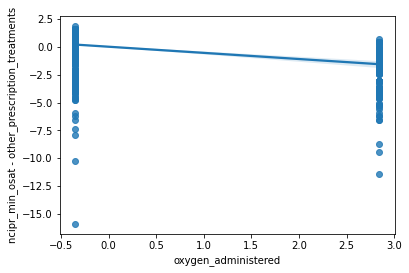

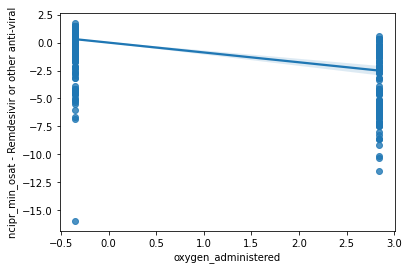

In [ ]:
for column in covid_df.columns:
    plt.figure()
    # plt.scatter(covid_df['oxygen_administered'], covid_df['ncipr_min_osat'] - covid_df[column])
    sns.regplot(x=covid_df['oxygen_administered'], y=covid_df['ncipr_min_osat'] - covid_df[column])
    plt.xlabel('oxygen_administered')
    plt.ylabel(f'ncipr_min_osat - {column}')